In [1]:
format compact; setappdata(0, "MKernel_plot_format", 'svg')
cd matlab

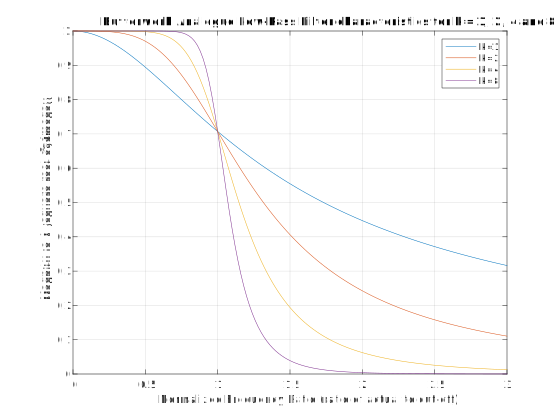

In [2]:
w_w0 = 0:0.02:3;
Aw2k1 = sqrt(1./(w_w0.^2 + 1)); Aw2k2 = sqrt(1./(w_w0.^4 + 1));
Aw2k4 = sqrt(1./(w_w0.^8 + 1)); Aw2k8 = sqrt(1./(w_w0.^16 + 1));
plot(w_w0,Aw2k1,w_w0,Aw2k2,w_w0,Aw2k4,w_w0,Aw2k8),grid on
xlabel('Normalized Frequency Ratio (ratio of actual to cut-off)')
ylabel('Magnitude A (square root of A^2(omega))')
title('Butterworh Analogue Low-Pass Filter characteristics for k = 1, 2, 4 and 8')
legend('k=1','k=2','k=4','k=8')

In [3]:
syms s; den = (s + 1)*(s + 1/2 - j*sqrt(3)/2)*(s + 1/2 + j*sqrt(3)/2)

den =
(s + 1)*(s - (3^(1/2)*1i)/2 + 1/2)*(s + (3^(1/2)*1i)/2 + 1/2)


In [4]:
expand(den)

ans =
s^3 + 2*s^2 + 2*s + 1


In [5]:
[z,p,k] = buttap(3);
[b,a] = zp2tf(z,p,k)

b =
         0         0         0    1.0000
a =
    1.0000    2.0000    2.0000    1.0000



G =
 
            1
  ---------------------
  s^3 + 2 s^2 + 2 s + 1
 
Continuous-time transfer function.


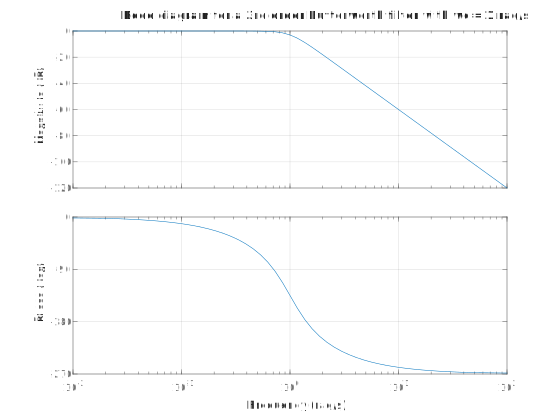

In [6]:
G = tf(b,a)
bode(G), grid on
title('Bode diagram for a 3rd order Butterworth filter with wc = 1 rad/s')

In [7]:
[z,p,k] = buttap(3);
[b,a] = zp2tf(z,p,k);
fc = 1e3; % 1 kHz
wc = 2*pi*fc; % rad/s
format long
[b, a] = lp2lp(b, a, wc)

b =
     2.480502134423985e+11
a =
   1.0e+11 *
  Columns 1 through 3
   0.000000000010000   0.000000125663706   0.000789568352087
  Column 4
   2.480502134423986


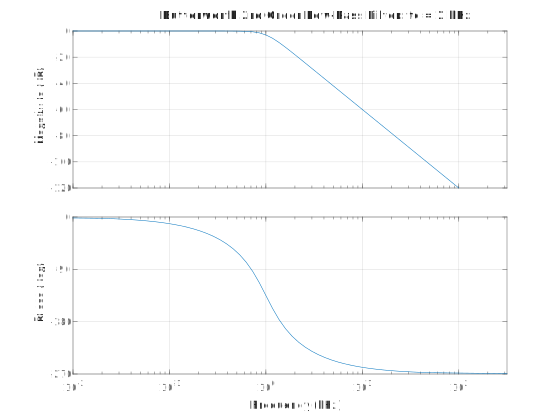

In [8]:
h = bodeplot(tf(b, a)); setoptions(h,'FreqUnits','kHz'),grid on
title('Butterworth 3rd Order Low-Pass Filter: fc = 1 kHz')

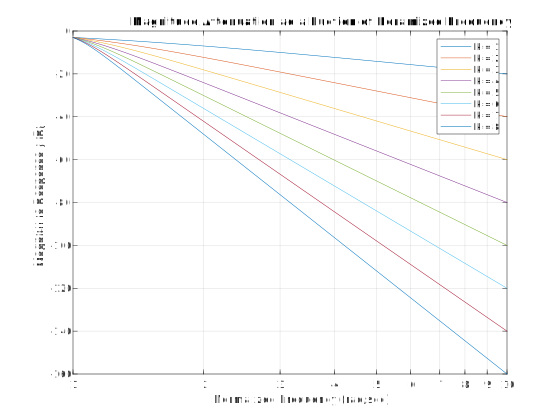

In [9]:
w_w0 = 1:0.01:10; dBk1 = 20.*log10(sqrt(1./(w_w0.^2 + 1)));
dBk2 = 20.*log10(sqrt(1./(w_w0.^4 + 1))); dBk3 = 20.*log10(sqrt(1./(w_w0.^6 + 1)));
dBk4 = 20.*log10(sqrt(1./(w_w0.^8 + 1))); dBk5 = 20.*log10(sqrt(1./(w_w0.^10 + 1)));
dBk6 = 20.*log10(sqrt(1./(w_w0.^12 + 1))); dBk7 = 20.*log10(sqrt(1./(w_w0.^14 + 1)));
dBk8 = 20.*log10(sqrt(1./(w_w0.^16 + 1)));
semilogx(w_w0,dBk1,w_w0,dBk2,w_w0,dBk3,w_w0,dBk4,...
         w_w0,dBk5,w_w0,dBk6,w_w0,dBk7,w_w0,dBk8)
xlabel('Normalized Frequency (rad/sec)'),ylabel('Magnitude Response (dB)')
title('Magnitude Attenuation ad a Fuction of Noramized Frequency')
set(gca, 'XTick',[1:10]),grid
legend('k = 1','k = 2','k = 3','k = 4','k = 5','k = 6','k = 7','k = 8')

In [10]:
w = 0:0.05:400; % Range of frequencies to plot.
[z,p,k] = cheb1ap(2, 3);
[b, a] = zp2tf(z, p, k) % Convert zeros and poles of G(s) to polynomial form

b =
                   0                   0   0.501188646503800
a =
   1.000000000000000   0.644899651302867   0.707947780125280


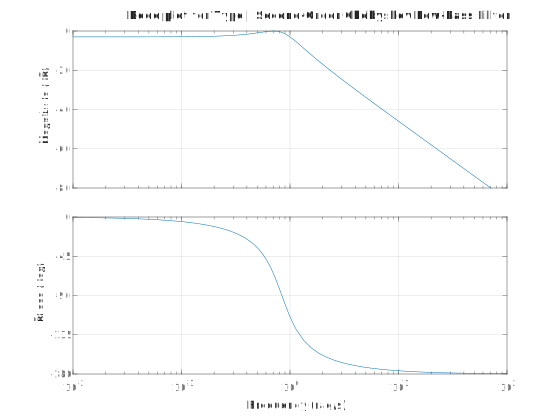

In [11]:
bode(b, a)
title('Bode plot for Type | Second-Order Chebyshev Low-Pass Filter')
grid on

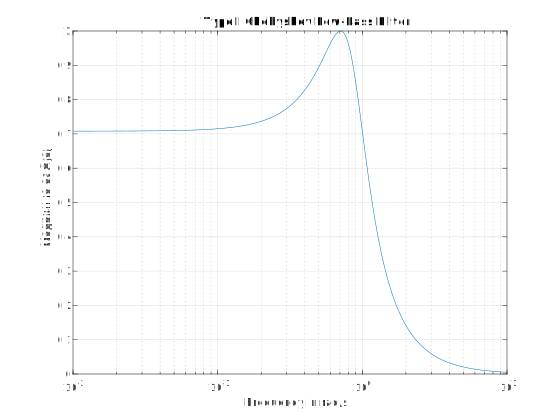

In [12]:
w = 0:0.01:10;
Gs = freqs(b, a, w); % returns response as complex values
semilogx(w,abs(Gs)),grid on
xlabel('Frequency in rad/s'),ylabel('Magnitude of G(s)')
title('Type I Chebyshev Low-Pass Filter')

In [13]:
w = 0:0.01:1000;
[z,p,k] = cheb2ap(3,3);
[b, a] = zp2tf(z,p,k)

b =
  Columns 1 through 3
                   0   3.007131879022801                   0
  Column 4
   4.009509172030401
a =
  Columns 1 through 3
   1.000000000000000   3.716637149027132   2.385274779846660
  Column 4
   4.009509172030401


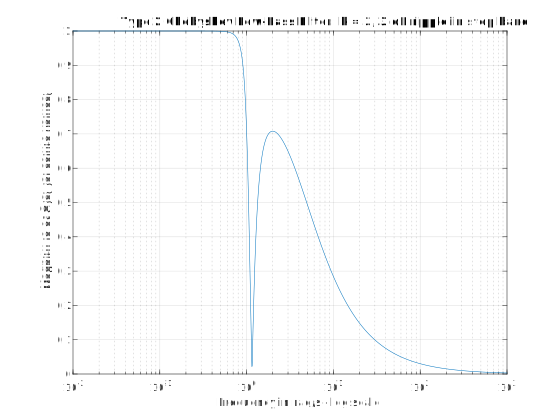

In [14]:
Gs = freqs(b, a, w); semilogx(w,abs(Gs))
xlabel('Frequency in rad/s - log scale')
ylabel('Magnitude of G(s) (absolute values)')
title('Type 2 Chebyshev Low-Pass Filter: k = 3, 3 dB ripple in stop band')
grid

In [15]:
w = 0:0.05:500;
[z,p,k] = ellip(5, 0.6, 20, 200, 's');
[b,a] = zp2tf(z,p,k);

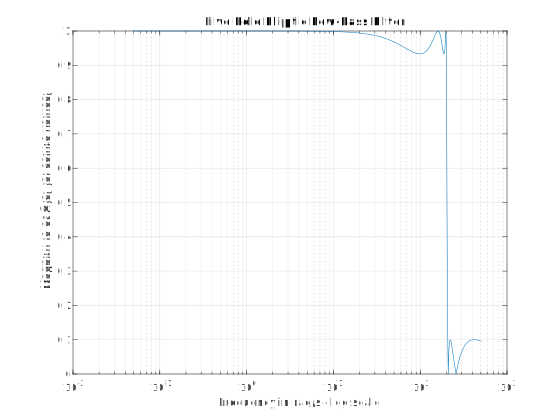

In [16]:
Gs = freqs(b,a,w);
semilogx(w,abs(Gs)),grid on
xlabel('Frequency in rad/s - log scale'),ylabel('Magnitude of G(s) (absolute values)')
title('Five Pole Elliptic Low-Pass Filter ')

In [17]:
% design 3 pole Type I Chebyshev low-pass filter, wc = 1 rad/s
[z,p,k] = cheb1ap(3,3);    % 3 pole, 3dB ripple in pass band
[b,a] = zp2tf(z,p,k);      % Compute numerator and denoninator coefficents with wcn = 1 rad/s
f = 1000:100:100000;       % Define frequency range to plot
fc = 5000;                 % Define actual cutoff frequency at 5 kHz
wc = 2*pi*fc;              % Convert desired cut-off frequency to rad/s
[bn,an] = lp2hp(b, a, wc); % Compute numerator and denoninator coefficents of high-pass filter with fc = 5 kHz

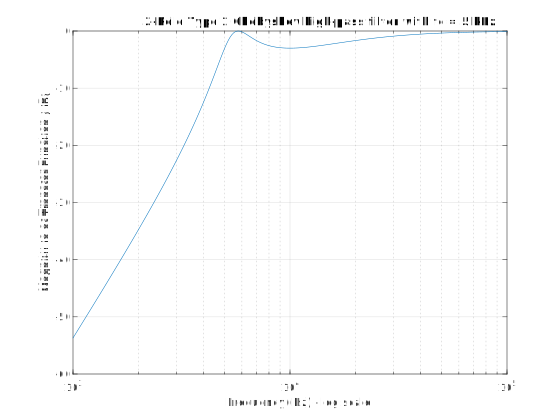

In [18]:
% Compute and plot frequency response of high-pass filter
Gsn = freqs(bn, an, 2*pi*f);
semilogx(f, 20*log10(abs(Gsn))), grid
xlabel('Frequency (Hz) - log scale'),ylabel('Magnitude of Transfer Function (dB)')
title('3-Pole Type 1 Chebyshev high-pass filter with fc = 5 kHz')

In [19]:
format short;
% design 3 pole Butterworth low-pass filter, wc = 1 rad/s
[z,p,k] = buttap(3);       % 3 pole
[b,a] = zp2tf(z,p,k);      % Compute numerator and denoninator coefficents with wcn = 1 rad/s
f = 100:100:100000;        % Define frequency range to plot
f0 = 4000;                 % Define center frequency at 4 kHz
W0 = 2*pi*f0;              % Convert desired centre frequency to rad/s
fbw = 2000;                % Define bandwidth
Bw = 2*pi*fbw;             % Convert desired bandwidth to rad/s
[bn,an] = lp2bp(b, a, W0, Bw); % Compute numerator and denoninator coefficents of band-pass filter

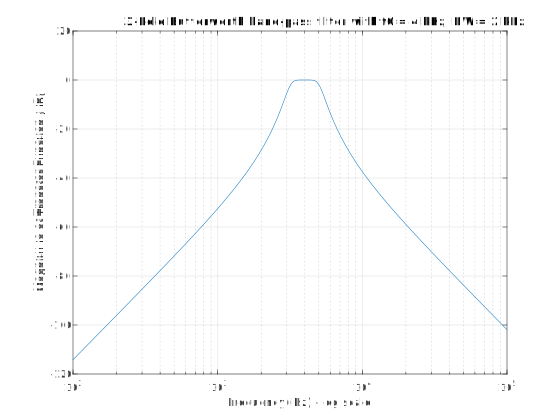

In [20]:
% Compute and plot frequency response of band-pass filter
Gsn = freqs(bn, an, 2*pi*f);
semilogx(f, 20*log10(abs(Gsn))), grid
xlabel('Frequency (Hz) - log scale'),ylabel('Magnitude of Transfer Function (dB)')
title('3-Pole Butterworth band-pass filter with f0 = 4 kHz, BW = 2 kHz')

In [21]:
format short;
% design 3 pole Butterworth low-pass filter, wc = 1 rad/s
[z,p,k] = buttap(3);       % 3 pole
[b,a] = zp2tf(z,p,k);      % Compute numerator and denoninator coefficents with wcn = 1 rad/s
f = 1000:100:10000;        % Define frequency range to plot
f0 = 5000;                 % Define center frequency at 4 kHz
W0 = 2*pi*f0;              % Convert desired centre frequency to rad/s
fbw = 2000;                % Define bandwidth
Bw = 2*pi*fbw;             % Convert desired bandwidth to rad/s
[bn,an] = lp2bs(b, a, W0, Bw); % Compute numerator and denoninator coefficents of band-pass filter

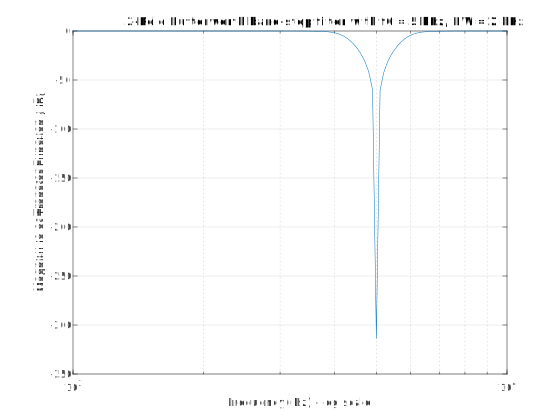

In [22]:
% Compute and plot frequency response of band-pass filter
Gsn = freqs(bn, an, 2*pi*f);
semilogx(f, 20*log10(abs(Gsn))), grid
xlabel('Frequency (Hz) - log scale'),ylabel('Magnitude of Transfer Function (dB)')
title('3-Pole Butterworth band-stop filter with f0 = 5 kHz, BW = 2 kHz')